In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from pyvis.network import Network

In [10]:
df = pd.read_csv('outputs/atr_p_values.csv')

clusters = {
    0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    1: ['CVD'],
    2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
    3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
    4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
    5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
    6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
    7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
    8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
    9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
    10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
    11: ['Glycoprotein_Acetyls']
}

nx_graph = nx.Graph()

# nodes w/ clusters
node_clusters = {}
for cluster_id, features in clusters.items():
    for feature in features:
        color = plt.cm.tab20(cluster_id / len(clusters))[:3]  # normalize colors to RGB
        encoded_feature = feature.encode('utf-8', 'ignore').decode('utf-8')
        nx_graph.add_node(encoded_feature, color='rgb({}, {}, {})'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255)), title=feature)
        node_clusters[encoded_feature] = cluster_id

edges_with_p_values = []

for _, row in df.iterrows():
    dep_node = row['Depression Attribute']
    nmr_node = row['NMR Attribute']
    cvd_node = row['CVD Attribute']
    p_value = row['P-Value']
    
    # does node exist in graph
    if dep_node in nx_graph.nodes and nmr_node in nx_graph.nodes:
        edges_with_p_values.append((dep_node, nmr_node, p_value))
    if cvd_node in nx_graph.nodes and nmr_node in nx_graph.nodes:
        edges_with_p_values.append((cvd_node, nmr_node, p_value))

edges_with_p_values.sort(key=lambda x: x[2])
threshold = 0.8
filtered_edges = [edge for edge in edges_with_p_values if edge[2] > threshold]

# Add edges
for edge in filtered_edges:
    node_i, node_j, p_value = edge
    nx_graph.add_edge(node_i, node_j, p_value=p_value)


pyvis_net = Network(notebook=True, height="750px", width="100%")
pyvis_net.from_nx(nx_graph)

# Customize edges
for edge in pyvis_net.edges:
    if edge['from'] == 'CVD' or edge['to'] == 'CVD':
        edge['color'] = 'pink'
    else:
        edge['color'] = 'lightblue'

output_file = "outputs/network_visualization.html"
pyvis_net.show(output_file)
print(f"Visualization saved to {output_file}")


outputs/network_visualization.html
Visualization saved to outputs/network_visualization.html


Finding Significant Clusters

In [3]:
cvd_df = pd.read_csv('outputs/atr_p_values.csv')
cvd_df = cvd_df.dropna(subset=['CVD Attribute'])

clusters = {
    0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    1: ['CVD'],
    2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
    3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
    4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
    5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
    6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
    7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
    8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
    9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
    10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
    11: ['Glycoprotein_Acetyls']
}

# AVG P-Values
def assign_cluster(nmr_value):
    for cluster, values in clusters.items():
        if nmr_value in values:
            return cluster
    return None

cvd_df['Clusters'] = cvd_df['NMR Attribute'].apply(assign_cluster)
cvd_average_p_values = cvd_df.groupby('Clusters')['P-Value'].mean()
print("CVD")
print("Avg P-value per cluster", cvd_average_p_values)


# AVG MI values
def assign_cluster(nmr_value):
    for cluster, values in clusters.items():
        if nmr_value in values:
            return cluster
    return None

cvd_df['Clusters'] = cvd_df['NMR Attribute'].apply(assign_cluster)
cvd_average_mi_values = cvd_df.groupby('Clusters')['Mutual Information'].mean()
print("Avg MI per cluster", cvd_average_mi_values)

CVD
Avg P-value per cluster Clusters
2     0.504950
3     0.514301
4     0.471947
5     0.503065
6     0.511001
7     0.511001
8     0.507701
9     0.536854
10    0.510451
11    0.504950
Name: P-Value, dtype: float64
Avg MI per cluster Clusters
2     0.002272
3     0.001842
4     0.002475
5     0.003076
6     0.003026
7     0.003023
8     0.002046
9     0.000994
10    0.002006
11    0.003388
Name: Mutual Information, dtype: float64


In [4]:
categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters', 'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins', 'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins', 'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins', 'Other Specific Markers' ]
data = zip(categories, cvd_average_mi_values, cvd_average_p_values)

csv_file = 'outputs/cvd_avg_p_mi.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Category', 'Average_MI', 'Average_P'])
    writer.writerows(data)

In [5]:
depr_df = pd.read_csv('outputs/atr_p_values.csv')
depr_df = depr_df.dropna(subset=['Depression Attribute'])

clusters = {
    0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    1: ['CVD'],
    2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
    3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
    4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
    5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
    6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
    7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
    8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
    9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
    10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
    11: ['Glycoprotein_Acetyls']
}

# AVG P-Values
def assign_cluster(nmr_value):
    for cluster, values in clusters.items():
        if nmr_value in values:
            return cluster
    return None

depr_df['Clusters'] = depr_df['NMR Attribute'].apply(assign_cluster)
depr_average_p_values = depr_df.groupby('Clusters')['P-Value'].mean()
print("DESPRESSION")
print("Avg P-value per cluster", depr_average_p_values)


# AVG MI values
def assign_cluster(nmr_value):
    for cluster, values in clusters.items():
        if nmr_value in values:
            return cluster
    return None

depr_df['Clusters'] = depr_df['NMR Attribute'].apply(assign_cluster)
depr_average_mi_values = depr_df.groupby('Clusters')['Mutual Information'].mean()
print("Avg MI per cluster", depr_average_mi_values)

DESPRESSION
Avg P-value per cluster Clusters
2     0.737211
3     0.742574
4     0.671617
5     0.734402
6     0.736432
7     0.731161
8     0.741107
9     0.725660
10    0.735424
11    0.641089
Name: P-Value, dtype: float64
Avg MI per cluster Clusters
2     0.000101
3     0.000095
4     0.000180
5     0.000109
6     0.000119
7     0.000114
8     0.000099
9     0.000080
10    0.000105
11    0.000307
Name: Mutual Information, dtype: float64


In [6]:
categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters', 'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins', 'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins', 'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins', 'Other Specific Markers' ]
data = zip(categories, depr_average_mi_values, depr_average_p_values)

csv_file = 'outputs/depr_avg_p_mi.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Category', 'Average_MI', 'Average_P'])
    writer.writerows(data)

print(f'CSV file "{csv_file}" has been created successfully.')

CSV file "outputs/depr_avg_p_mi.csv" has been created successfully.


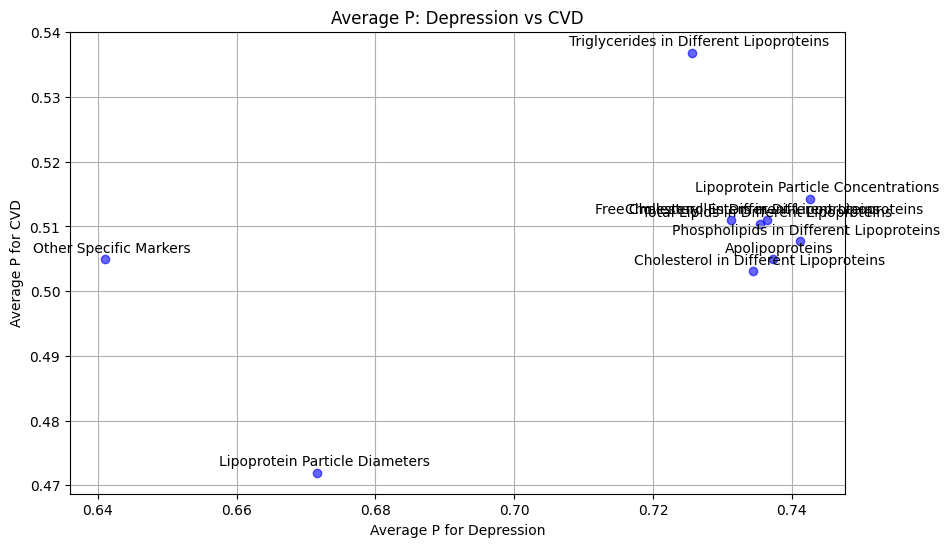

<Figure size 640x480 with 0 Axes>

In [7]:
depr_df_avg = pd.read_csv('outputs/depr_avg_p_mi.csv')
cvd_df_avg = pd.read_csv('outputs/cvd_avg_p_mi.csv')

merged_df = pd.merge(cvd_df_avg, depr_df_avg, on='Category', suffixes=('_CVD', '_Depression'))
# print(merged_df)

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average_P_Depression'], merged_df['Average_P_CVD'], color='blue', alpha=0.6)
plt.title('Average P: Depression vs CVD')
plt.xlabel('Average P for Depression')
plt.ylabel('Average P for CVD')
plt.grid(True)
for i, category in enumerate(categories): #text for points
    plt.annotate(category, (merged_df['Average_P_Depression'][i], merged_df['Average_P_CVD'][i]), textcoords="offset points", xytext=(5,5), ha='center')
plt.show()
plt.savefig('outputs/cvd_v_depr_p_val.png', dpi=300)

## want low P, specifically below 0.05